In [133]:
import xlrd
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import normaltest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [79]:
dados= pd.read_excel('resultados teste avaliacao geral1.xlsx')

# <center> Análise estatística <center/>


 <h3><body><center> Verificando qual a melhor estratégia para a tomada de decisão <h3/><body/><center/>

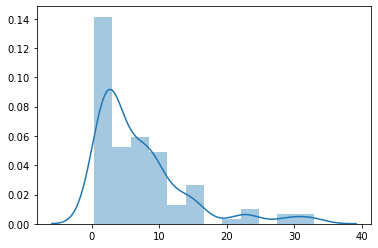

In [80]:
sns.distplot(dados)

In [190]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Valor_fix_OPS       14 non-null     float64
 1   Valor_temp_OPS      14 non-null     float64
 2   Valor_fix_Leigos    14 non-null     float64
 3   Valor_temp_Leigos   14 non-null     float64
 4   Valor_fix_Médicos   14 non-null     float64
 5   Valor_temp_Médicos  14 non-null     float64
 6   Valor_fix_Pais      14 non-null     float64
 7   Valor_temp_Pais     14 non-null     float64
dtypes: float64(8)
memory usage: 1.0 KB


In [194]:
dados.describe()

,Valor_fix_OPS,Valor_temp_OPS,Valor_fix_Leigos,Valor_temp_Leigos,Valor_fix_Médicos,Valor_temp_Médicos,Valor_fix_Pais,Valor_temp_Pais
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.142857,7.141429,7.142143,7.143571,7.142143,7.143571,7.142143,7.143571
std,5.910441,7.621971,6.262156,8.198454,6.390009,7.826500,5.931210,8.365449
min,1.480000,0.820000,1.530000,0.310000,1.210000,0.630000,1.410000,1.090000
25%,2.850000,2.225000,3.020000,2.362500,2.772500,2.010000,2.875000,1.970000
50%,5.270000,4.630000,4.875000,5.625000,5.195000,4.705000,5.300000,4.115000
75%,9.715000,9.362500,9.057500,8.870000,8.290000,7.607500,9.540000,8.355000
max,22.470000,29.520000,24.210000,32.890000,22.460000,28.910000,21.910000,32.180000


 <h3><center> Logo, sabemos que não é uma distribução normal, pois N é menor que 30 <h3><center>

<h2><center>Cálculo simples relacionando as variáveis, para identificar o pvalor e o teste t. Considerando as variáveis INDEPENDENTES<h2><center>

In [167]:
ttest_ind(dados['Valor_fix_OPS'],dados['Valor_fix_Leigos'], equal_var=False)

Ttest_indResult(statistic=0.00031037483701502384, pvalue=0.9997547337639392)

In [168]:
ttest_ind(dados['Valor_fix_OPS'],dados['Valor_fix_Médicos'], equal_var=False)

Ttest_indResult(statistic=0.00030704366577792244, pvalue=0.999757372501024)

In [169]:
ttest_ind(dados['Valor_fix_OPS'],dados['Valor_fix_Pais'], equal_var=False)

Ttest_indResult(statistic=0.00031918175618742873, pvalue=0.9997477662586883)

In [170]:
ttest_ind(dados['Valor_fix_Pais'],dados['Valor_fix_Leigos'], equal_var=False)

Ttest_indResult(statistic=3.85297075363123e-16, pvalue=0.9999999999999997)

In [171]:
ttest_ind(dados['Valor_fix_Pais'],dados['Valor_fix_Médicos'], equal_var=False)

Ttest_indResult(statistic=7.62350471122124e-16, pvalue=0.9999999999999994)

In [172]:
ttest_ind(dados['Valor_fix_Leigos'],dados['Valor_fix_Médicos'], equal_var=False)

Ttest_indResult(statistic=3.7144301044398746e-16, pvalue=0.9999999999999997)

In [173]:
ttest_ind(dados['Valor_temp_Pais'],dados['Valor_temp_Médicos'], equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [174]:
ttest_ind(dados['Valor_temp_Pais'],dados['Valor_temp_Leigos'], equal_var=False)

Ttest_indResult(statistic=-2.8372297367773794e-16, pvalue=0.9999999999999998)

In [175]:
ttest_ind(dados['Valor_temp_Pais'],dados['Valor_temp_OPS'], equal_var=False)

Ttest_indResult(statistic=0.0007084753681771538, pvalue=0.9994401728488558)

In [176]:
ttest_ind(dados['Valor_temp_Médicos'],dados['Valor_temp_OPS'], equal_var=False)

Ttest_indResult(statistic=0.0007339199131170143, pvalue=0.9994200228453934)

In [177]:
ttest_ind(dados['Valor_temp_Médicos'],dados['Valor_temp_Leigos'], equal_var=False)

Ttest_indResult(statistic=-2.932010352084958e-16, pvalue=0.9999999999999998)

In [178]:
ttest_ind(dados['Valor_temp_OPS'],dados['Valor_temp_Leigos'], equal_var=False)

Ttest_indResult(statistic=-0.0007162521837819661, pvalue=0.9994340096883417)

In [180]:
dados.corr()

,Valor_fix_OPS,Valor_temp_OPS,Valor_fix_Leigos,Valor_temp_Leigos,Valor_fix_Médicos,Valor_temp_Médicos,Valor_fix_Pais,Valor_temp_Pais
Valor_fix_OPS,1.000000,0.968646,0.992871,0.917004,0.965840,0.963125,0.993172,0.931543
Valor_temp_OPS,0.968646,1.000000,0.985295,0.961126,0.939999,0.977092,0.966604,0.966470
Valor_fix_Leigos,0.992871,0.985295,1.000000,0.939423,0.969078,0.979737,0.993764,0.943534
Valor_temp_Leigos,0.917004,0.961126,0.939423,1.000000,0.852280,0.914608,0.908181,0.962100
Valor_fix_Médicos,0.965840,0.939999,0.969078,0.852280,1.000000,0.980989,0.977965,0.859842
Valor_temp_Médicos,0.963125,0.977092,0.979737,0.914608,0.980989,1.000000,0.970151,0.918768
Valor_fix_Pais,0.993172,0.966604,0.993764,0.908181,0.977965,0.970151,1.000000,0.916485
Valor_temp_Pais,0.931543,0.966470,0.943534,0.962100,0.859842,0.918768,0.916485,1.000000


In [181]:
correlacoes=dados.corr()

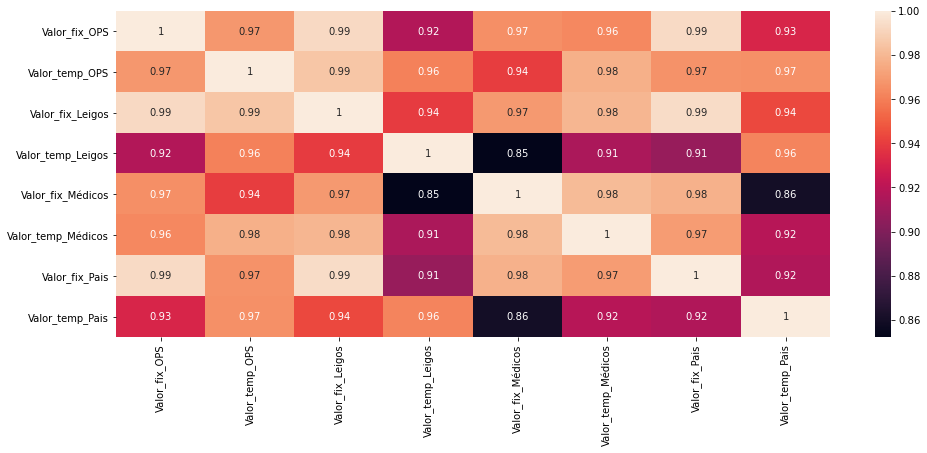

In [182]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

<h2><center>Cálculo simples relacionando as variáveis, para identificar o pvalor e o teste t. Considerando as variáveis DEPENDENTES<h2><center>

In [197]:
from scipy.stats import ttest_rel

ttest_rel(dados['Valor_fix_OPS'],dados['Valor_fix_Leigos'])

Ttest_relResult(statistic=0.003311346254036439, pvalue=0.9974082078844142)

In [198]:
ttest_rel(dados['Valor_fix_OPS'],dados['Valor_fix_Médicos'])

Ttest_relResult(statistic=0.0015942619571155026, pvalue=0.9987521686043311)

In [200]:
ttest_rel(dados['Valor_fix_OPS'],dados['Valor_fix_Pais'])

Ttest_relResult(statistic=0.003860835627469981, pvalue=0.9969781244566531)

In [202]:
ttest_rel(dados['Valor_fix_Pais'],dados['Valor_fix_Leigos'])

Ttest_relResult(statistic=-1.1761903905439437e-15, pvalue=0.9999999999999991)